We will create lots of documents with different classes c1, c2, c3, c4, c5

In [1]:
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
import random


### Inputs 

In [2]:
#Number of Categories
numCategories = 5
#let us generate 1000 documents with varying values of proportions
NDOCS = 1000


len(words.words())

236736

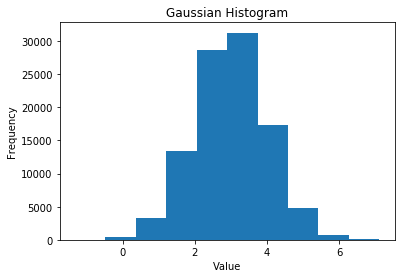

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline

#Set Seed and generaet Gaussian numbers - verufy through plot
np.random.seed(145)
gaussian_numbers = np.random.normal(loc=3, scale = 1 , size=100000)

plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()


#### Create/Refresh directories for data

In [4]:
import shutil
import os

#Create category Distribution data
dirname = "category_dist"
if os.path.exists(dirname):
    shutil.rmtree(dirname)
os.makedirs(dirname)
        
#Create directories for generated data
for i in range(1,numCategories+1):
    dirname = "gen_data/c{}".format(i)
    if os.path.exists(dirname):
        print("Directory " + dirname + " exists, removing - and creating fresh..")
        shutil.rmtree(dirname) #os.rmdir(dirname)
    else:
        print("Directory " + dirname + " does not exist")
    os.makedirs(dirname)

Directory gen_data/c1 exists, removing - and creating fresh..
Directory gen_data/c2 exists, removing - and creating fresh..
Directory gen_data/c3 exists, removing - and creating fresh..
Directory gen_data/c4 exists, removing - and creating fresh..
Directory gen_data/c5 exists, removing - and creating fresh..


#### Generate probability distribution for each category

Here we create words commonly found in each category. We take all the words, divide it into N(=5) buckets and generate lots of words from each bucket centered around the midpoint of the bucket. By doing this we create distribution of words for each category. We store this distribution as raw data in each file ** category_sample_c1 ** to ** category_sample_c5 **

In [5]:
SAMPLE_BATCH_SIZE=10000
def winsorize(x, winmin, winmax):
    if (x > winmax):
        return(winmax)
    if(x < winmin):
        return(winmin)   
    return(x)

np.random.seed(145)
all_words = words.words()
step = int(len(words.words())/numCategories)

for i in range(1,numCategories+1):
    meanRef = (i-1) * step + int(step/2)
    sdRef   = step/2
    print("Generating for " + "c{}".format(i)  + ":   meanRef={} sdRef={}".format(meanRef, sdRef))
    filename = "category_dist/category_sample_c{}".format(i)
    if os.path.exists(filename):
        os.remove(filename)
    f = open(filename, 'w')
    for j in range(0,10):
        gaussian_numbers = np.random.normal(loc=meanRef, scale = sdRef , size=SAMPLE_BATCH_SIZE)
        #those gone negative should be winsorized
        sampledWords = [all_words[winsorize(int(x), 0, len(all_words) - 1)] for x in gaussian_numbers]
        f.write("\n".join(sampledWords))
        f.write("\n")
    #close file
    f.close()

Generating for c1:   meanRef=23673 sdRef=23673.5
Generating for c2:   meanRef=71020 sdRef=23673.5
Generating for c3:   meanRef=118367 sdRef=23673.5
Generating for c4:   meanRef=165714 sdRef=23673.5
Generating for c5:   meanRef=213061 sdRef=23673.5


#### Data generation for documents

1. We generate 1000 documents of different categories by random sampling and save them in ** gen_data/cN ** folders



In [6]:
#Create documents for  all the categories
all_stop_words = stopwords.words('english')

from random import choices

def genDocument(size, categories, stopwordsProp = 0.30):
    sizeStopWords = int(stopwordsProp * size)
    sizeCategWords = size - sizeStopWords
    #print("sizeStopWords=%s" % sizeStopWords)
    #print("sizeCategWords=%s" % sizeCategWords)
    simulatedWords = []
    for key in categories.keys():
        prob = categories[key]
        filepath = "category_dist/category_sample_" + key
        with open(filepath, 'r') as f:
            lines = f.read().splitlines()
        simulatedWords.extend(choices(lines, k = int(prob*sizeCategWords)))
    #Mix with stopwords
    simulatedWords.extend(choices(all_stop_words, k = sizeStopWords))
    #Shuffle the list - inplace
    random.shuffle(simulatedWords)
    #print(simulatedWords)
    return(simulatedWords)

In [7]:
def getRandomProportionsDict(numCategories, jerk=0.8):
    props = np.random.uniform(0,1,numCategories)
    #jerk up one 
    jerkidx = random.randint(0,numCategories-1)
    props[jerkidx] += jerk
    props = props/sum(props)
    return(dict([("c{}".format(k), props[k-1]) for k in range(1, numCategories + 1)]))

print(getRandomProportionsDict(numCategories))

{'c1': 0.20438177821297476, 'c2': 0.13988434636996894, 'c3': 0.080746587147298987, 'c4': 0.42711857995966368, 'c5': 0.14786870831009352}


In [8]:
## Test
categories = getRandomProportionsDict(numCategories)
print(categories)
inverse = [(value, key) for key, value in categories.items()]
print(max(inverse)[1])

#print (genDocument(size = 1000,categories= {"c1": 0.5, "c2":0.3, "c5" : 0.2}, stopwordsProp=0.30))
print (" ".join( genDocument(size = 50,categories= {"c1": 0.5, "c2":0.3, "c5" : 0.2}, stopwordsProp=0.30)))

{'c1': 0.1967558849201051, 'c2': 0.58496948611164512, 'c3': 0.028981255629560394, 'c4': 0.16550393951837075, 'c5': 0.023789433820318711}
c2
most no when hydrotical uninoculated aristolochine now aspersion exegetist semitransverse them asidehand why aren uniquity license syndicalist cardstock disestablish didn macrandrous glandarious demeanor needn't birefringent A trackage checkerwork have in they Taungthu cheering an duodenocholedochotomy carrier counterimpulse chauvinism gimcracky most Condalia abate commensuration A on folkmote burion demology truehearted


In [9]:
#let us generate NDOCS documents with varying values of proportions
metaDataList = []
for i in range(0,NDOCS):
    categories = getRandomProportionsDict(numCategories)
    inverse = [(value, key) for key, value in categories.items()]
    max_categ = max(inverse)[1]
    #size of doc between 250 to 1500
    size = random.randint(250, 1500)
    doc       =  genDocument(size, categories, stopwordsProp = 0.30)
    doc       = " ".join(doc)
    filepath  =  "gen_data/{}/{}.doc".format(max_categ,i)
    #print("Writing to file " + filepath)
    vals = [value for key, value in categories.items()]
    vals.append(filepath)
    metaDataList.append(vals)
    with open(filepath, 'w') as f:
            lines = f.write(doc)

#Prepare and write metadata information
import pandas as pd
cols  = ["c{}".format(i) for i in range(1, numCategories+1)]
cols.append("filepath")
df = pd.DataFrame(metaDataList, columns=cols)
df.to_csv("meta_data_gen_data.csv", index= False)

In [10]:
#Display what is written and generated
df

,c1,c2,c3,c4,c5,filepath
0,0.049028,0.028450,0.526544,0.333171,0.062807,gen_data/c3/0.doc
1,0.074786,0.148212,0.380397,0.118363,0.278242,gen_data/c3/1.doc
2,0.104617,0.206549,0.284171,0.233672,0.170991,gen_data/c3/2.doc
3,0.381724,0.170374,0.269563,0.118561,0.059778,gen_data/c1/3.doc
4,0.198133,0.079733,0.007328,0.255499,0.459308,gen_data/c5/4.doc
5,0.025999,0.281692,0.534660,0.073339,0.084311,gen_data/c3/5.doc
6,0.048826,0.221913,0.154557,0.485508,0.089196,gen_data/c4/6.doc
7,0.097693,0.207880,0.320869,0.148682,0.224875,gen_data/c3/7.doc
8,0.157830,0.103652,0.079788,0.247113,0.411618,gen_data/c5/8.doc
9,0.114711,0.047108,0.039360,0.233379,0.565443,gen_data/c5/9.doc
